# **Case Study Machine Learning GDGoC UNSRI 2024/2025**  
- **Nama**: Kevin Adiputra Mahesa  
- **Jurusan**: Sistem Komputer  
- **Angkatan**: 2023  

## **Dataset yang Digunakan**  
Dataset yang digunakan dalam case study ini adalah **"Data Science Salaries 2024"**, yang dapat diakses melalui tautan berikut:  
[Dataset Data Science Salaries 2024 - Kaggle](https://www.kaggle.com/datasets/yusufdelikkaya/datascience-salaries-2024)  

### **Deskripsi Dataset**  
Dataset ini berisi informasi tentang gaji para profesional di bidang data science untuk tahun 2024. Data mencakup berbagai atribut penting seperti:  
- work_year: Tahun kerja.
- experience_level: Tingkat pengalaman (Entry-Level, Mid-Level, Senior, Executive).
- employment_type: Jenis pekerjaan (Full-Time, Part-Time, Contract, Freelance).
- job_title: Pekerjaan.
- salary: Gaji dalam mata uang lokal.
- salary_currency: Mata uang gaji.
- salary_in_usd: Gaji dalam USD.
- employee_residence: Negara tempat tinggal karyawan.
- remote_ratio: Persentase kerja jarak jauh (0, 50, atau 100).
- company_location: Lokasi perusahaan.
- company_size: Ukuran perusahaan berdasarkan jumlah karyawan (S: Small, M: Medium, L: Large).

### **Tujuan Analisis**  
Studi kasus ini bertujuan untuk:  
1. Mengeksplorasi pola dan tren gaji di industri data science.  
2. Menganalisis faktor-faktor utama yang memengaruhi gaji, seperti pengalaman, lokasi, dan ukuran perusahaan.  
3. Menyediakan visualisasi dan insight yang membantu memahami pasar tenaga kerja di bidang data science.  
4. Mendeploy hasil analisa pada steamlit.

# 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import bebrapa library yang akan digunakan untuk analisa data pada studi kasus ini.

# 2. Data Wrangling

In [ ]:
# @title data load
df = pd.read_csv('https://drive.google.com/uc?id=1vSqGTpyfBocrnp4VllFVuBg7QC6B-2jj')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


Menampilkan 5 baris awal dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


Pada informasi dasar dataset ini, didapatkan sebagai berikut:
- Dataset memiliki atribut sebanyak 11 kolom, dan entri sebanyak 14838 baris data.
- Dari informasi dasar tersebut juga dapat diambil kesimpuan bahwa tidak ada nilai yang kosong dari dataset.
- Atribut dataset terdiri dari 4 numerikal, dan 7 kategorikal

In [ ]:
# @title Melihat bentuk Dataset
df.shape

(14838, 11)

In [ ]:
# @title melihat nilai unik setiap kolom kategorikal
for col in df.select_dtypes(include='object').columns:
  print(f'{col}: {df[col].unique()}')

experience_level: ['MI' 'SE' 'EN' 'EX']
employment_type: ['FT' 'FL' 'CT' 'PT']
job_title: ['Data Scientist' 'BI Data Analyst' 'ML Engineer'
 'Lead Machine Learning Engineer' 'Data Science Manager'
 'Head of Machine Learning' 'Research Engineer' 'Head of Data Science'
 'AI Programmer' 'Machine Learning Engineer' 'Lead Data Scientist'
 'Data Engineer' 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Data Analytics Manager' 'Data Integration Specialist'
 'Principal Data Architect' 'NLP Engineer' 'Big Data Engineer'
 'AI Research Engineer' 'Machine Learning Software Engineer'
 'Data Analyst' 'Applied Data Scientist' 'AI Scientist'
 'Data Analytics Lead' 'Business Data Analyst' 'Product Data Analyst'
 'Computer Vision Engineer' 'Data Science Consultant' 'AI Architect'
 'Analytics Engineer' 'Machine Learning Scientist' 'Research Scientist'
 'Prompt Engineer' 'Principal Data Scientist' 'Applied Scientist'
 'Deep Learning Engineer' 'Data Architect' 'AI Engineer'
 'Data Infrastructure

Untuk ini saya melakukan pengecekan terhadap nilai unik yang dimiliki oleh setiap kolom kategorikal, terlihat bahwa nilai uniknnya banyak sekali, sehingga jika dilakukkan encoding akan membuat data tersebut memiliki banyak sekali atribut. Sehingga pada studi kasus kali ini saya tidak melakukan encoding.

# 2. Data Availability

In [ ]:
# @title Mengecek nilai kosong
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


Terlihat memang benar tidak ada nilai kosong pada Dataset, sehingga tidak diperlukan penanganan lebih lanjut.

In [ ]:
# @title Mengecek nilai duplikat
df.duplicated().sum()

5711

Terlihat pada data set ini, memiliki duplikat yang sangat banyak. Namun hal itu wajar mengingat Dataset ini memiliki object dan numerikal yang memiliki persentase yang konsisten, seperti jenis perkerjaan, rasio jarak, dan pekerjaan yang sama, namun berbeda individu.

# 3. Exploration Data Analysis

In [ ]:
# @title Deskripsi Data
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


Dari deskripsi data berikut, dapat disimpulkan beberapa hal:
1. Rata-rata paa tahun kerja 2023..., yang artinnya sebagian besar tahun kerja berasal dari tahun 2023.
2. Rata-Rata Salary in usd adalah 149.874,
3. Kuartil pertama (25%) menunjukkan bahwa 25% dari individu mendapatkan gaji di bawah 102.100, sedangkan kuartil ketiga (75%) menunjukkan bahwa 25% dari individu mendapatkan gaji di atas 185.900. Menjelaskan jika ada kesenjangan yang signifikan pada gaji.
4. Pada kuartil 3 (75%) juga pada bagian remote, 100%, menunjukkan bahwa 25% individu yang gajinnya diatas 185.900 bekerja secara remote.


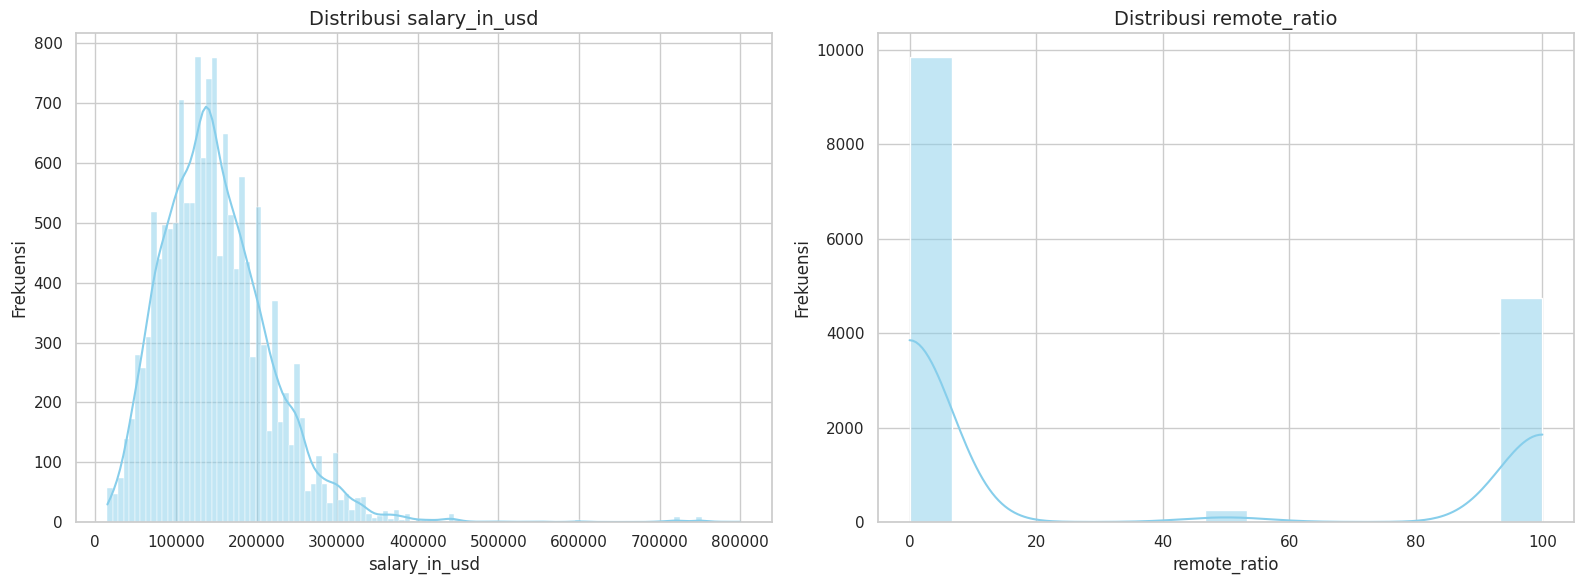

In [ ]:
# @title Melihat Distribusi kolom numerikal
sns.set_theme(style="whitegrid")
# Inisialisasi kolom numerikal
numeric_columns = ["salary_in_usd", "remote_ratio"]
categorical_columns = ["experience_level", "company_size", "employment_type"]

# Plot distribusi untuk kolom numerikal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribusi {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frekuensi", fontsize=12)
plt.tight_layout()
plt.show()

Dari visualisasi distiribusi ini kita mendapatkan beberapa insight:
## **Pada Distribusi Salary in usd**
- Distibusi yang skewed ke kanan, atau skewed positive, dapat terlihat ekor yang mengarah ke arah kanan. Hal ini berarti sebagian besar data terkonsentrasi di sebelah kiri
- Puncak distribusi berada pada angka sekitar 150.000 USD, yang artinya banyak data yang berkumpul disekitar kisaran gaji tersebut.

## **Pada Distribusi remote ratio**
- Distribusi juga skewed kekanan, yang artinyya sebagian besar data terkonsentrasi di sebelah kiri.
- Puncak distribusi berada di nilai 0, yang artinya mayoritas pekerja melakukan pekerjaannya secara on site atau non remote.

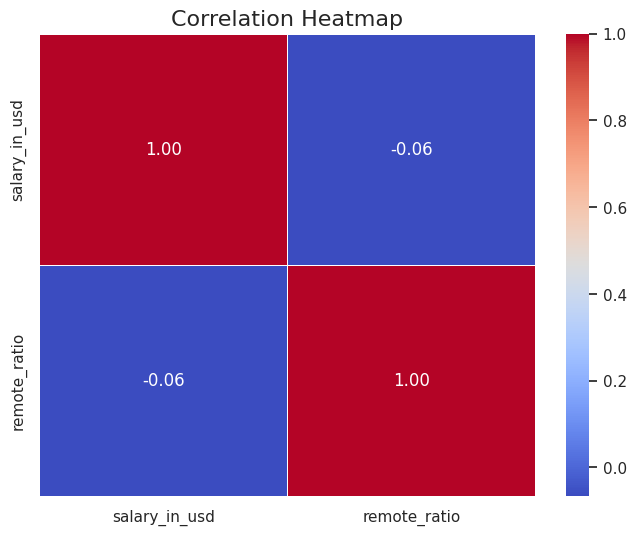

In [ ]:
# @title Heatmap korelasi untuk kolom numerikal
corr = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Pada korelasi heatmap ini didapatkan bahwa salary in usd dan remote ratio tidak memiliki korelasi atau hubungan yang kuat.

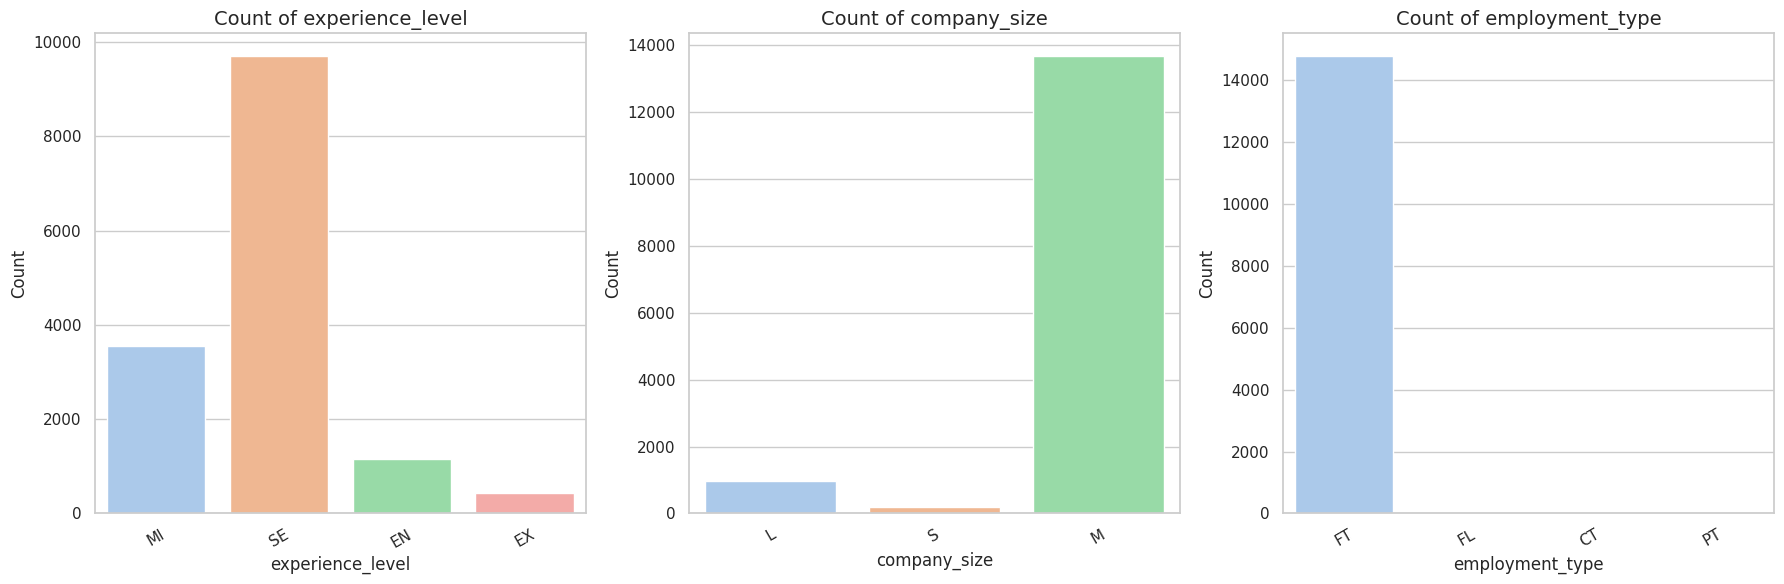

In [ ]:
# @title Countplot untuk kolom kategorikal
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
    axes[i].set_title(f"Count of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis="x", rotation=30)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi Countplot ini didapatkan sebagai berikut:
1. Pada Countplot pengalaman, sebagian individu berpengalaman di SE atau senior, diikuti dengan MI(Mid), EN(Entry), dan EX(Expert).
2. sebagian besar individu beraasal dari perusahaan M (Medium), diikuti oleh L (Large), dan S(Small) yang memiliki perbandingan yang jauh lebih sedikit. Artinyya sebagian besar individu banyak yang bekerja di perusahaan yang sedang atau medium.
3. Kebanyakan atau hampir semua individu bekerja FT (Fulltime).

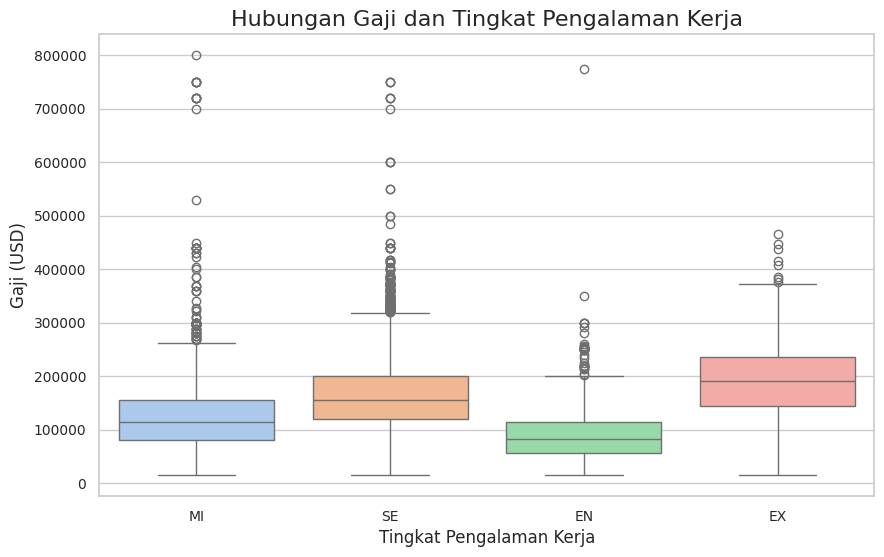

In [ ]:
# @title Plot hubungan antara gaji dan pengalaman kerja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd", palette="pastel")
plt.title("Hubungan Gaji dan Tingkat Pengalaman Kerja", fontsize=16)
plt.xlabel("Tingkat Pengalaman Kerja", fontsize=12)
plt.ylabel("Gaji (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan boxplot ini didapatkan beberapa insight berkut:
1. Semakin tinggi tingkat pengalaman, maka gajinya semakin tinggi hal tersebut ditunjukkan oleh median gaji yang lebih tinggi dibandingkan tingkat pengalaman lainnya.
2. Variasi gaji yang tinggi tiap tingkat pengalaman, dapat dilihat pada rentang antar kuartil (IQR) yang cukup lebar.
3. Adanya outlier menandakan adannya individu yang memiliki gaji lebih besar dari pengalamannya, dapat diakibatkan oleh beberapa faktor antara kemampuan, atau perusahaan.

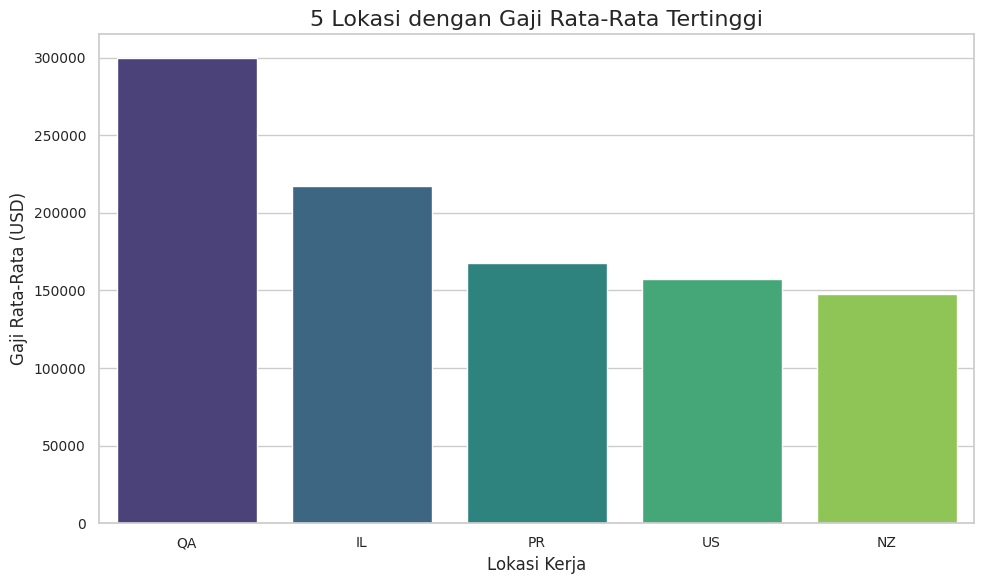

In [ ]:
# @title 5 lokasi dengan gaji rata-rata tertinggi
average_salary_by_location = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)
top_5_locations = average_salary_by_location.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_locations.index, y=top_5_locations.values, palette="viridis")
plt.title("5 Lokasi dengan Gaji Rata-Rata Tertinggi", fontsize=16)
plt.xlabel("Lokasi Kerja", fontsize=12)
plt.ylabel("Gaji Rata-Rata (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Dari visalisasi didapatkan insight sebagai berikut:
1. Qatar (QA) memiliki rata-rata gaji tertinggi, yaitu sekitar 300.000 USD
2. Israel (IL) dan Puerto Rico (PR) memiliki gaji rata-rata yang lebih rendah daripada Qatar (QA), tetapi masih lebih tinggi daripada Amerika Serikat (US) dan Selandia Baru (NZ).
3. Amerika Serikat (US) dan Selandia Baru (NZ) memiliki gaji rata-rata yang lebih rendah daripada Qatar (QA), Israel (IL), dan Puerto Rico (PR).

# Kesimpulan Insight;
1. Hampir semua individu adalah pekerja FT (Full time).
2. Pengalaman memiliki pengaruh terhadap gaji, semakin tinggi pengalaman, semakin tinggi pula gaji. Namun ada beberapa faktor lain yang dapat mempengaruhi seperti lokasi, serta perusahaan.
3. Kebanyakan individu memiliki pengalaman sebagai Senior.
4. Rata-rata gaji adalah 149.874.